<a href="https://colab.research.google.com/github/mithilreddy369/2024/blob/master/Brain%20Stroke%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
from google.colab import drive
import pandas as pd
import warnings

warnings.filterwarnings("ignore")


The drive.mount() function creates a virtual link between Google Drive and Colab, enabling the latter to treat the Drive as a local file system. The mounted Drive is accessible via the /content/drive/My Drive path. Subsequently, standard Python libraries can be employed to load and process data from the mounted Drive.

In [213]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
# Assuming your dataset is named 'brain_stroke.csv' inside a folder 'MTECHDataSet'
data = pd.read_csv('/content/drive/My Drive/MTECHDataSet/healthcare-dataset-stroke-data.csv')
data.head() # This will print the first few rows of your data

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Check for missing values in the dataset
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Imputing Missing Values

K-Nearest Neighbors (KNN) Imputation
* Best For: Numeric or categorical data where relationships with other features can help predict missing values.

* Pros: Accounts for the relationships between features, often providing better estimates.

* Cons: Computationally intensive, especially for large datasets.

* When to Use: When you have sufficient computational resources and when the missing data can be inferred from other features.


In [217]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
data[['bmi']] = imputer.fit_transform(data[['bmi']])


In [218]:
# Verify that all missing values have been imputed
data.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

1. Statistical Summary

In [ ]:
data.describe()


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    32.800000     0.000000  
max           271.740000    97.600000     1.000000

In [ ]:
data.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a high-contrast color palette
sns.set_palette('bright')


# Alternatively, you can create a custom color palette
custom_colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C', '#E67E22']
sns.set_palette(sns.color_palette(custom_colors))

# Set style and context for better contrast
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)



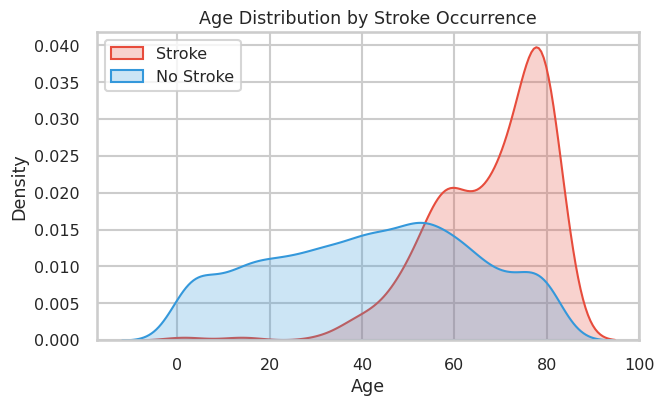

In [ ]:
plt.figure(figsize=(7, 4))

sns.kdeplot(data=data[data['stroke'] == 1], x='age', fill=True, label='Stroke')
sns.kdeplot(data=data[data['stroke'] == 0], x='age', fill=True, label='No Stroke')

plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

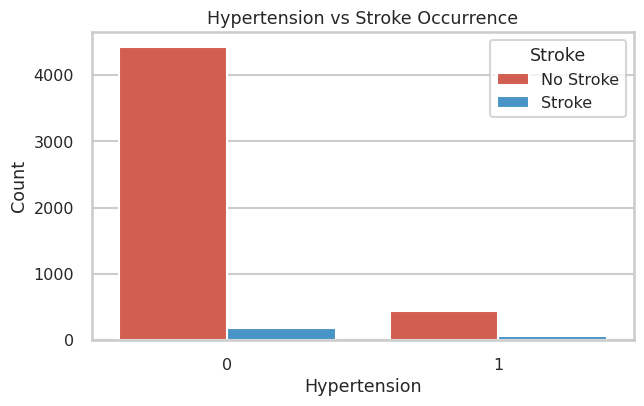

In [ ]:

plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='hypertension', hue='stroke')
plt.title('Hypertension vs Stroke Occurrence')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


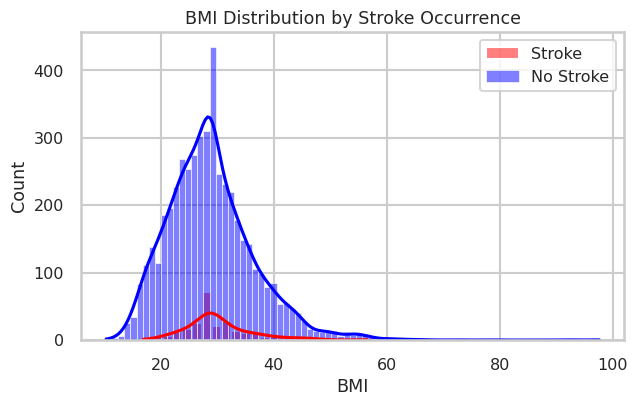

In [ ]:

plt.figure(figsize=(7, 4))
sns.histplot(data=data[data['stroke'] == 1], x='bmi', color='c', kde=True, label='Stroke')
sns.histplot(data=data[data['stroke'] == 0], x='bmi', color='blue', kde=True, label='No Stroke')
plt.title('BMI Distribution by Stroke Occurrence')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()


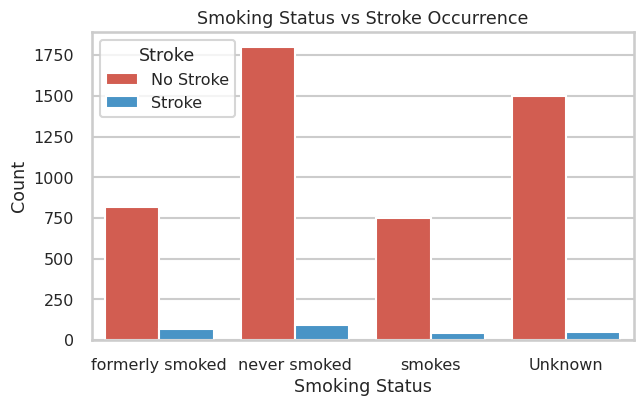

In [ ]:

plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke Occurrence')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


1. Correlation Heatmap
* Purpose: Identify correlations between numeric features and their potential influence on stroke occurrence.
* Impact: Helps in understanding which features might be more important for predicting strokes.


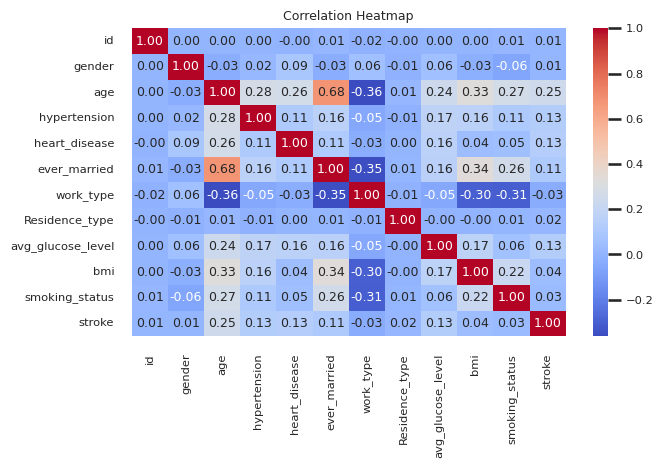

In [ ]:
plt.figure(figsize=(7, 4))
sns.set_context("talk", font_scale=0.5)

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


2. Distribution of Age with Stroke Overlay
* Purpose: Visualize the distribution of age and see how it varies between stroke and non-stroke patients.
* Impact: Age is often a significant factor in stroke prediction.

3. Boxplot of BMI by Stroke Occurrence
* Purpose: Compare BMI distributions between stroke and non-stroke patients.
* Impact: Identifies whether BMI is a distinguishing factor for stroke.

7. Bar Plot of Gender by Stroke Occurrence
* Purpose: Examine gender differences in stroke occurrence.
* Impact: Identifies if gender plays a role in stroke prevalence.

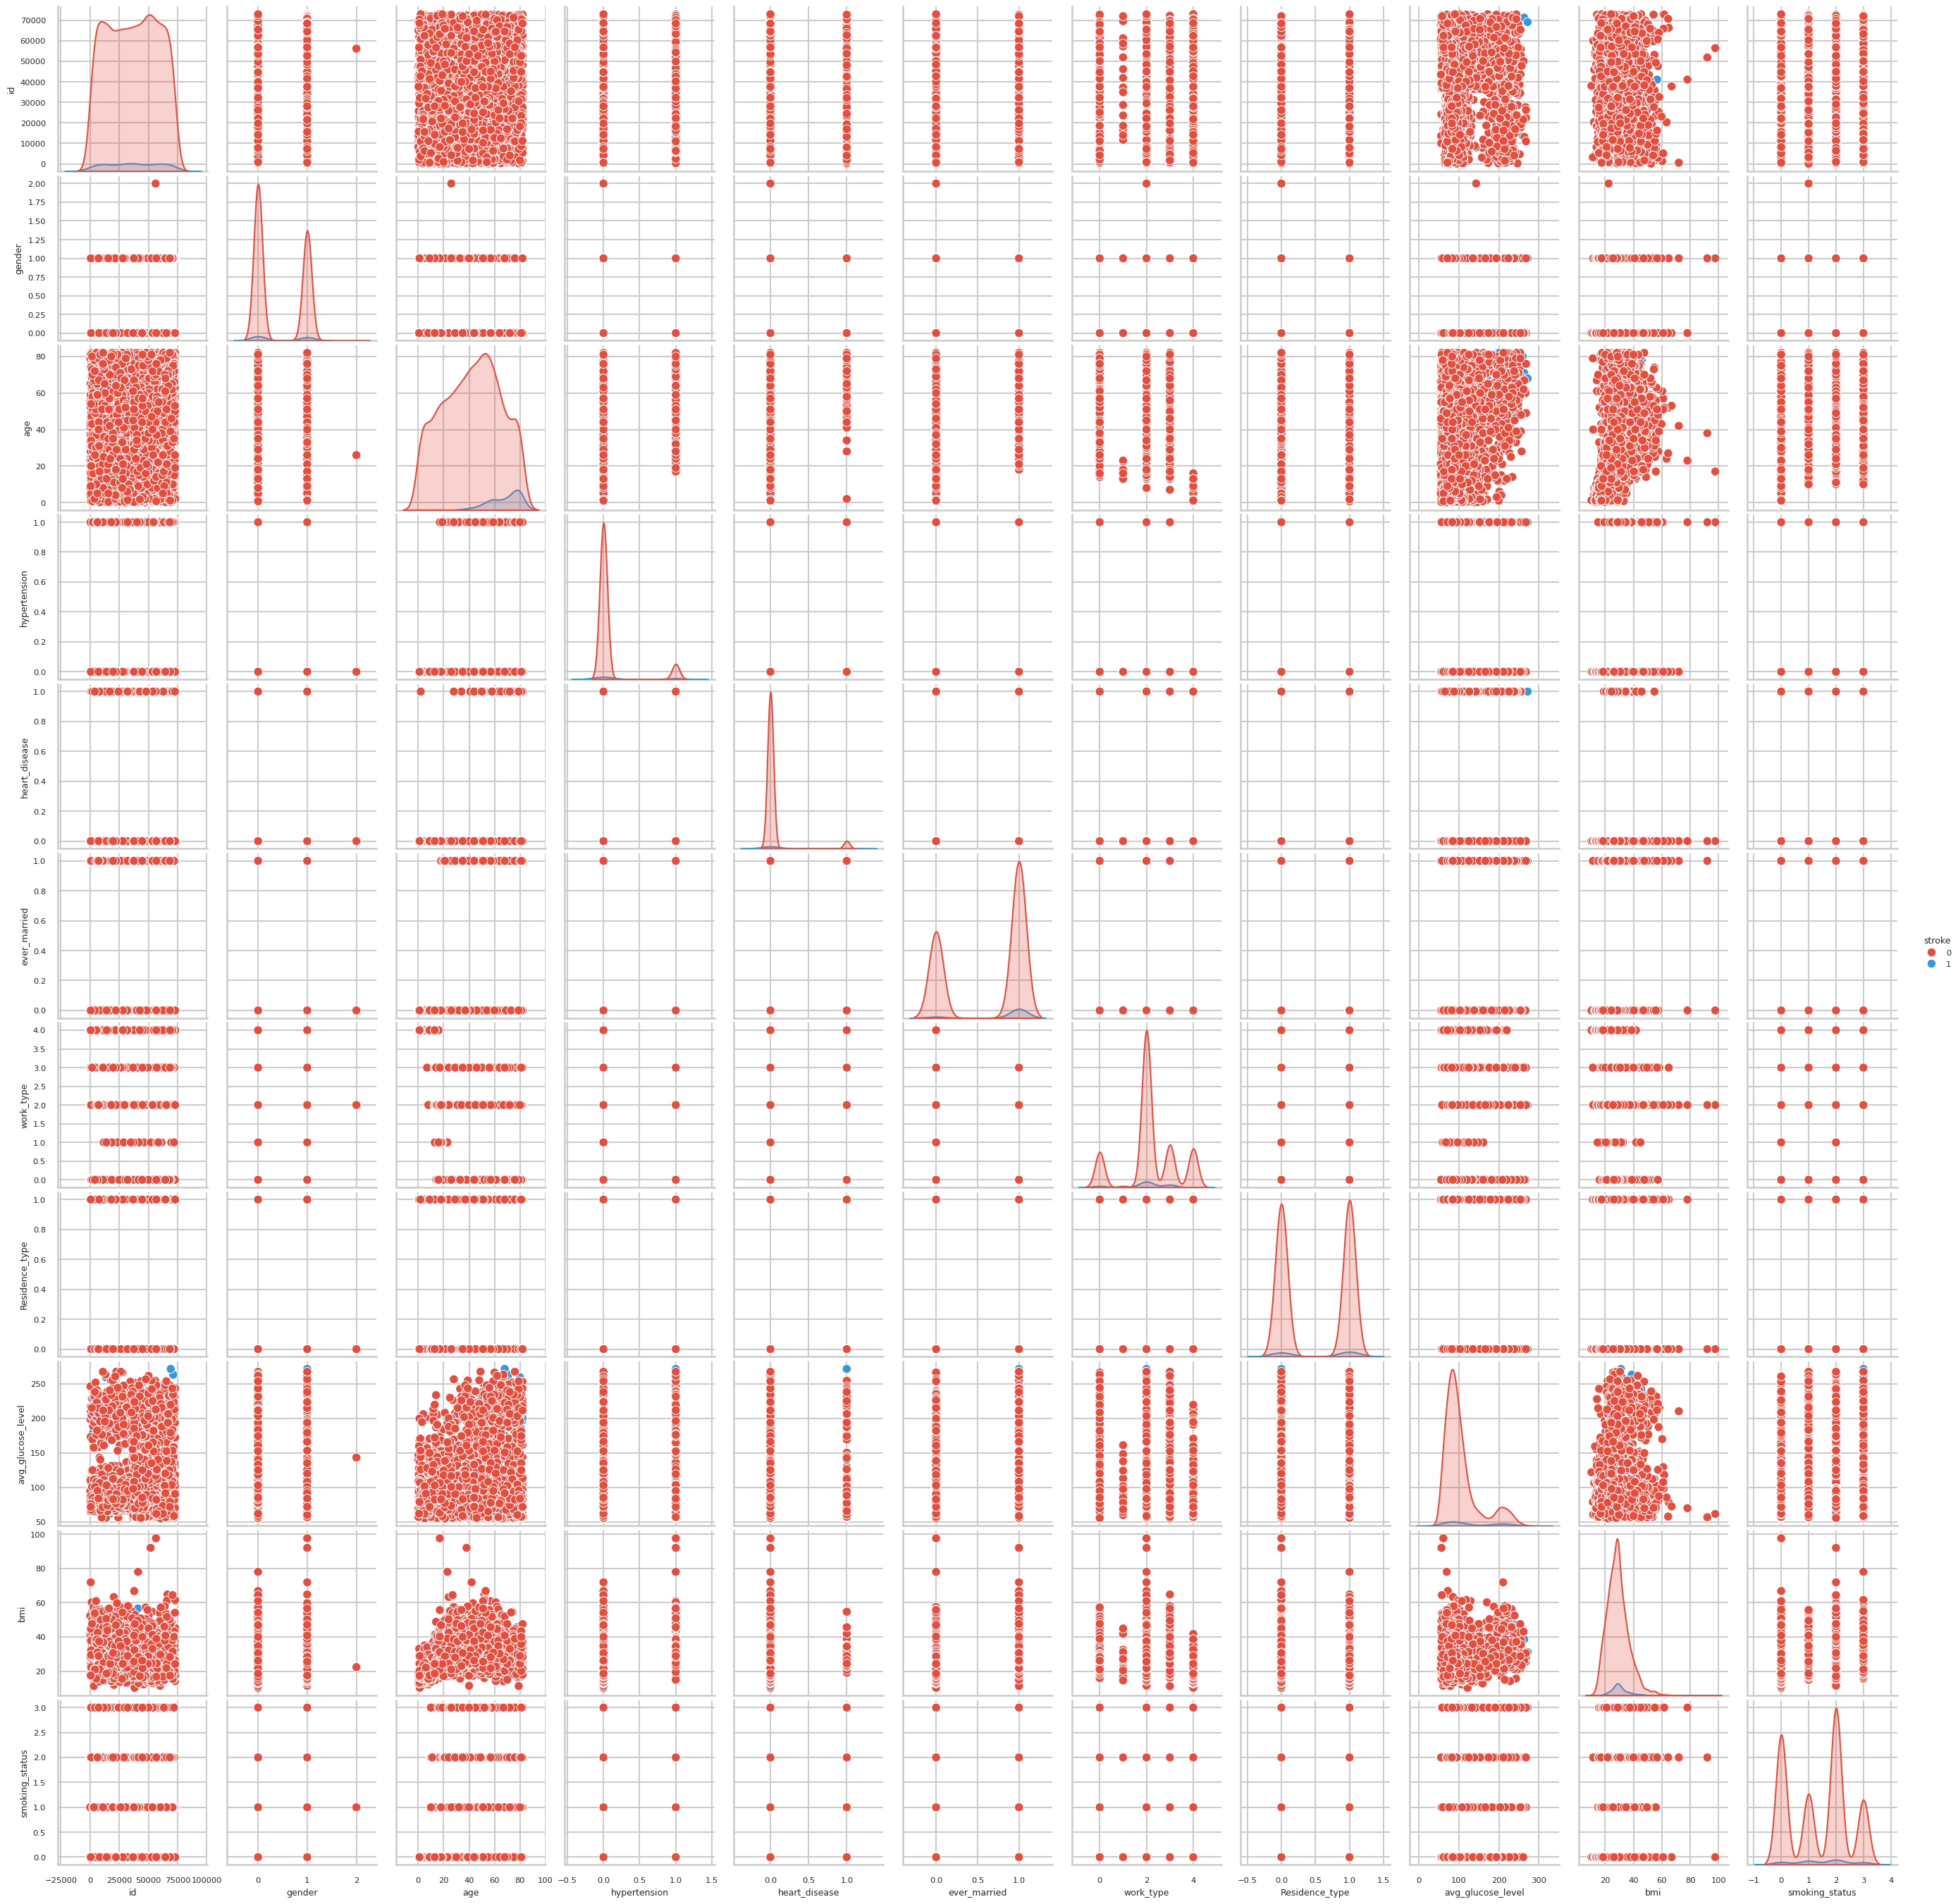

In [ ]:
sns.pairplot(data, hue='stroke')
plt.show()


Label Encoding

In [219]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
column_mappings = {}

for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])
        column_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print(column_mappings)

{'gender': {'Female': 0, 'Male': 1, 'Other': 2}, 'ever_married': {'No': 0, 'Yes': 1}, 'work_type': {'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}, 'Residence_type': {'Rural': 0, 'Urban': 1}, 'smoking_status': {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}}


ever_married:
* No -> 0
* Yes -> 1

work_type:
* Govt_job -> 0
* Never_worked -> 1
* Private -> 2
* Self_employed -> 3
* children -> 4

Residence_type:
* Rural -> 0
* Urban -> 1

smoking_status:
* Unknown -> 0
* formerly smoked -> 1
* never smoked -> 2
* smokes -> 3

In [220]:
data.head()


id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [221]:
data.dtypes

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object



1. **Body Mass Index (BMI) Category**: Categorizes BMI into underweight, normal weight, overweight, and obesity.

2. **Glucose Level Category**: Categorizes glucose levels into low, normal, pre-diabetic, and diabetic.

3. **Age and BMI Interaction**: Creates a feature based on the interaction of age and BMI.

4. **Married and Work Type Interaction**: Creates a feature based on the interaction between marital status and work type.

5. **High Risk Indicators**: Indicates the presence of any high-risk factors such as hypertension, heart disease, high glucose, or obesity.

6. **Age Group**: Categorizes age into young, middle-aged, and senior.

7. **Risk Factor**: Sums hypertension, heart disease, and age group to create a composite risk score.

8. **Glucose-BMI Ratio**: Creates a ratio of glucose level to BMI, representing how glucose levels relate to body mass.

9. **Married Working**: Indicates if a married individual is working in a non-government job.

10. **Urban Smoker**: Indicates if someone is a smoker residing in an urban area.

11. **Age Group and Work Type Interaction**: Creates a feature based on the interaction between age group and work type.

12. **Smoking Status and Residence Type Interaction**: Creates a feature based on the interaction between smoking status and residence type.

13. **Age and Hypertension Interaction**: Creates a feature based on the interaction between age and hypertension status.

14. **Age and Heart Disease Interaction**: Creates a feature based on the interaction between age and heart disease status.

15. **Glucose Level and Hypertension Interaction**: Creates a feature based on the interaction between glucose level and hypertension status.

16. **Glucose Level and Heart Disease Interaction**: Creates a feature based on the interaction between glucose level and heart disease status.

17. **BMI and Hypertension Interaction**: Creates a feature based on the interaction between BMI and hypertension status.

18. **BMI and Heart Disease Interaction**: Creates a feature based on the interaction between BMI and heart disease status.

19. **Glucose and BMI Ratio by Age Group**: Creates a ratio of glucose level to BMI, further modified by age group.

20. **Glucose Level and Age Group Interaction**: Creates a feature based on the interaction between glucose level and age group.

21. **Age and Glucose Level Interaction**: Creates a feature based on the interaction between age and glucose level.

22. **BMI and Glucose Level Interaction**: Creates a feature based on the interaction between BMI and glucose level.

23. **Hypertension and Glucose Level Category Interaction**: Creates a feature based on the interaction between hypertension and glucose level category.

24. **Heart Disease and Glucose Level Category Interaction**: Creates a feature based on the interaction between heart disease and glucose level category.

25. **Age Group and Glucose Category Interaction**: Creates a feature based on the interaction between age group and glucose level category.

26. **BMI Category and Glucose Level Category Interaction**: Creates a feature based on the interaction between BMI category and glucose level category.

27. **Age Group and BMI Category Interaction**: Creates a feature based on the interaction between age group and BMI category.

28. **Age and High Risk Indicators Interaction**: Creates a feature based on the interaction between age and high-risk indicators.

29. **Glucose-BMI Ratio and Risk Factor Interaction**: Creates a feature based on the interaction between the glucose-BMI ratio and the risk factor.

30. **Work Type and Risk Factor Interaction**: Creates a feature based on the interaction between work type and risk factor.

In [222]:
# Existing features
import pandas as pd

# Assuming 'data' is your DataFrame and it contains the relevant columns.

# 1. Body Mass Index (BMI) Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 24.9:
        return 1  # Normal weight
    elif bmi < 29.9:
        return 2  # Overweight
    else:
        return 3  # Obesity

data['bmi_category'] = data['bmi'].apply(bmi_category)

# 2. Glucose Level Category
def glucose_category(glucose):
    if glucose < 70:
        return 0  # Low
    elif glucose < 100:
        return 1  # Normal
    elif glucose < 126:
        return 2  # Pre-diabetic
    else:
        return 3  # Diabetic

data['glucose_category'] = data['avg_glucose_level'].apply(glucose_category)

# 3. Age and BMI Interaction
data['age_bmi_interaction'] = data['age'] * data['bmi']

# 4. Married and Work Type Interaction
data['married_work_interaction'] = data['ever_married'] * data['work_type']

# 5. High Risk Indicators
data['high_risk_indicators'] = (
    (data['hypertension'] == 1) |
    (data['heart_disease'] == 1) |
    (data['glucose_category'] == 3) |
    (data['bmi_category'] == 3)
).astype(int)

# 6. Age Group
def age_group(age):
    if age < 30:
        return 0  # Young
    elif age < 60:
        return 1  # Middle-aged
    else:
        return 2  # Senior

data['age_group'] = data['age'].apply(age_group)

# 7. Risk Factor
data['risk_factor'] = data['hypertension'] + data['heart_disease'] + data['age_group']

# 8. Glucose-BMI Ratio
data['glucose_bmi_ratio'] = data['avg_glucose_level'] / data['bmi']

# 9. Married Working
data['married_working'] = data['ever_married'] * (data['work_type'] != 1).astype(int)

# 10. Urban Smoker
data['urban_smoker'] = data['Residence_type'] * (data['smoking_status'] == 3).astype(int)

# 11. Age Group and Work Type Interaction
data['age_work_interaction'] = data['age_group'] * data['work_type']

# 12. Smoking Status and Residence Type Interaction
data['smoking_residence_interaction'] = data['smoking_status'] * data['Residence_type']

# 13. Age and Hypertension Interaction
data['age_hypertension_interaction'] = data['age'] * data['hypertension']

# 14. Age and Heart Disease Interaction
data['age_heart_disease_interaction'] = data['age'] * data['heart_disease']

# 15. Glucose Level and Hypertension Interaction
data['glucose_hypertension_interaction'] = data['avg_glucose_level'] * data['hypertension']

# 16. Glucose Level and Heart Disease Interaction
data['glucose_heart_disease_interaction'] = data['avg_glucose_level'] * data['heart_disease']

# 17. BMI and Hypertension Interaction
data['bmi_hypertension_interaction'] = data['bmi'] * data['hypertension']

# 18. BMI and Heart Disease Interaction
data['bmi_heart_disease_interaction'] = data['bmi'] * data['heart_disease']

# 19. Glucose and BMI Ratio by Age Group
data['age_group_glucose_bmi_ratio'] = data['age_group'] * data['glucose_bmi_ratio']

# 20. Glucose Level and Age Group Interaction
data['glucose_age_group_interaction'] = data['avg_glucose_level'] * data['age_group']

# New Features

# 21. Age and Glucose Level Interaction
data['age_glucose_interaction'] = data['age'] * data['avg_glucose_level']

# 22. BMI and Glucose Level Interaction
data['bmi_glucose_interaction'] = data['bmi'] * data['avg_glucose_level']

# 23. Hypertension and Glucose Level Category Interaction
data['hypertension_glucose_category_interaction'] = data['hypertension'] * data['glucose_category']

# 24. Heart Disease and Glucose Level Category Interaction
data['heart_disease_glucose_category_interaction'] = data['heart_disease'] * data['glucose_category']

# 25. Age Group and Glucose Category Interaction
data['age_group_glucose_category_interaction'] = data['age_group'] * data['glucose_category']

# 26. BMI Category and Glucose Level Category Interaction
data['bmi_category_glucose_category_interaction'] = data['bmi_category'] * data['glucose_category']

# 27. Age Group and BMI Category Interaction
data['age_group_bmi_category_interaction'] = data['age_group'] * data['bmi_category']

# 28. Age and High Risk Indicators Interaction
data['age_high_risk_interaction'] = data['age'] * data['high_risk_indicators']

# 29. Glucose-BMI Ratio and Risk Factor Interaction
data['glucose_bmi_ratio_risk_factor_interaction'] = data['glucose_bmi_ratio'] * data['risk_factor']

# 30. Work Type and Risk Factor Interaction
data['work_type_risk_factor_interaction'] = data['work_type'] * data['risk_factor']


In [223]:
print("DataFrame columns:", data.columns)

DataFrame columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_category', 'glucose_category',
       'age_bmi_interaction', 'married_work_interaction',
       'high_risk_indicators', 'age_group', 'risk_factor', 'glucose_bmi_ratio',
       'married_working', 'urban_smoker', 'age_work_interaction',
       'smoking_residence_interaction', 'age_hypertension_interaction',
       'age_heart_disease_interaction', 'glucose_hypertension_interaction',
       'glucose_heart_disease_interaction', 'bmi_hypertension_interaction',
       'bmi_heart_disease_interaction', 'age_group_glucose_bmi_ratio',
       'glucose_age_group_interaction', 'age_glucose_interaction',
       'bmi_glucose_interaction', 'hypertension_glucose_category_interaction',
       'heart_disease_glucose_category_interaction',
       'age_group_glucose_category_interaction',
       'bmi_catego

In [225]:
data.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  ...  age_glucose_interaction  \
0               1             228.69  36.600000  ...                 15322.23   
1               0             202.21  28.893237  ...                 12334.81   
2               0             105.92  32.500000  ...                  8473.60   
3               1             171.23  34.400000  ...                  8390.27   
4               0             174.12  24.000000  ...                 13755.48   

   bmi_glucose_interaction  hypertension_glucose_category_interaction  \
0              8370.054000                                          0   
1              5842.501436                                          0   
2              3442.400000                                          0   
3              5890.312000                                          0   
4              4178.880000                                          3   

   heart_disease_glucose_category_interaction  \
0                                           3   
1                                           0   
2                                           2   
3                                           0   
4                                           0   

   age_group_glucose_category_interaction  \
0                                       6   
1                                       6   
2                                       4   
3                                       3   
4                                       6   

   bmi_category_glucose_category_interaction  \
0                                          9   
1                                          6   
2                                          6   
3                                          9   
4                                          3   

   age_group_bmi_category_interaction  age_high_risk_interaction  \
0                                   6                       67.0   
1                                   4                       61.0   
2                                   6                       80.0   
3                                   3                       49.0   
4                                   2                       79.0   

   glucose_bmi_ratio_risk_factor_interaction  \
0                                  18.745082   
1                                  13.997047   
2                                   9.777231   
3                                   4.977616   
4                                  21.765000   

   work_type_risk_factor_interaction  
0                                  6  
1                                  6  
2                                  6  
3                                  2  
4                                  9  

[5 rows x 42 columns]

In [256]:
data.dtypes

id                                              int64
gender                                          int64
age                                           float64
hypertension                                    int64
heart_disease                                   int64
ever_married                                    int64
work_type                                       int64
Residence_type                                  int64
avg_glucose_level                             float64
bmi                                           float64
smoking_status                                  int64
stroke                                          int64
bmi_category                                    int64
glucose_category                                int64
age_bmi_interaction                           float64
married_work_interaction                        int64
high_risk_indicators                            int64
age_group                                       int64
risk_factor                                     int64
glucose_bmi_ratio                             float64
married_working                                 int64
urban_smoker                                    int64
age_work_interaction                            int64
smoking_residence_interaction                   int64
age_hypertension_interaction                  float64
age_heart_disease_interaction                 float64
glucose_hypertension_interaction              float64
glucose_heart_disease_interaction             float64
bmi_hypertension_interaction                  float64
bmi_heart_disease_interaction                 float64
age_group_glucose_bmi_ratio                   float64
glucose_age_group_interaction                 float64
age_glucose_interaction                       float64
bmi_glucose_interaction                       float64
hypertension_glucose_category_interaction       int64
heart_disease_glucose_category_interaction      int64
age_group_glucose_category_interaction          int64
bmi_category_glucose_category_interaction       int64
age_group_bmi_category_interaction              int64
age_high_risk_interaction                     float64
glucose_bmi_ratio_risk_factor_interaction     float64
work_type_risk_factor_interaction               int64
dtype: object

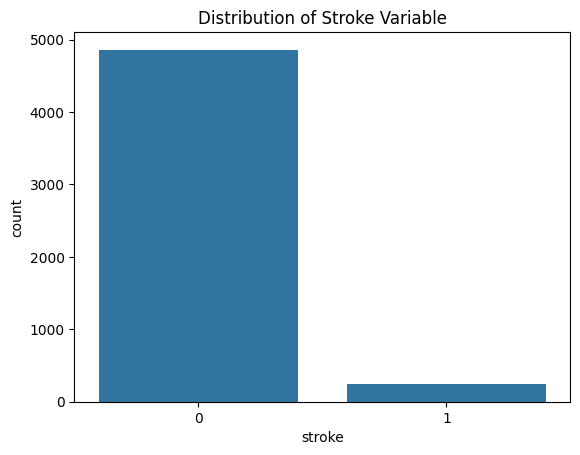

Class Counts:
 stroke
0    4861
1     249
Name: count, dtype: int64

Class Percentages:
 stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64
Ratio of Majority to Minority Class: 19.522088353413654


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame
# Count Plot
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Variable')
plt.show()

# Class Counts and Percentages
class_counts = data['stroke'].value_counts()
class_percentages = data['stroke'].value_counts(normalize=True) * 100

print('Class Counts:\n', class_counts)
print('\nClass Percentages:\n', class_percentages)

# Ratio of Majority to Minority Class
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

ratio = class_counts[majority_class] / class_counts[minority_class]
print(f'Ratio of Majority to Minority Class: {ratio}')


In [227]:
pip install imbalanced-learn


In [255]:
from imblearn.under_sampling import RandomUnderSampler


# Assuming `data` is your DataFrame and `stroke` is your target variable
X = data.drop(columns=['stroke'])
y = data['stroke']

# Initialize RandomUnderSampler
sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Print class counts and percentages
print('New Class Counts:\n', y_resampled.value_counts())
print('\nNew Class Percentages:\n', y_resampled.value_counts(normalize=True) * 100)



New Class Counts:
 stroke
0    249
1    249
Name: count, dtype: int64

New Class Percentages:
 stroke
0    50.0
1    50.0
Name: proportion, dtype: float64


In [244]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize LightGBM Classifier
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 200, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502513 -> initscore=0.010050
[LightGBM] [Info] Start training from score 0.010050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [245]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:\n", grid_search.best_params_)
print("Best Score:\n", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

In [250]:
!pip install --upgrade google-cloud-aiplatform


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.59.0
    Uninstalling google-cloud-aiplatform-1.59.0:
      Successfully uninstalled google-cloud-aiplatform-1.59.0


In [251]:
from google.cloud import aiplatform

# Initialize the AI Platform client
aiplatform.init(project='your-project-id', location='us-central1')

# Load the model
model = aiplatform.AutoMLTabularClassifier(model_name='your-model-id')

# Evaluate the model
evaluation = model.evaluate()

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", evaluation['accuracy'])
print("Precision:", evaluation['precision'])
print("Recall:", evaluation['recall'])
print("F1 Score:", evaluation['f1_score'])
print("AUC-ROC:", evaluation['roc_auc'])


AttributeError: module 'google.cloud.aiplatform' has no attribute 'AutoMLTabularClassifier'

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3263
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

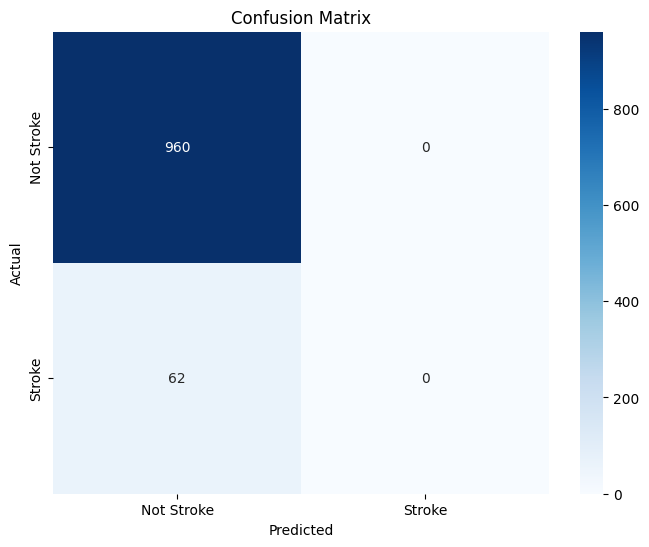

In [248]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `data` is your DataFrame
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions
param_dist = {
    'num_leaves': randint(20, 100),
    'max_depth': randint(-1, 50),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 200),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Initialize LightGBM Classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Perform Random Search
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc_roc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Stroke', 'Stroke'], yticklabels=['Not Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [247]:
from sklearn.metrics import classification_report, accuracy_score

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72        51
           1       0.69      0.84      0.76        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.74      0.74       100

Accuracy: 0.74


In [240]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[34 17]
 [ 9 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.72        51
           1       0.70      0.82      0.75        49

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.75      0.74      0.74       100



In [241]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize CatBoost Classifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[32 19]
 [11 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.63      0.68        51
           1       0.67      0.78      0.72        49

    accuracy                           0.70       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



In [242]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[36 15]
 [11 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.73        51
           1       0.72      0.78      0.75        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[33 18]
 [12 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69        51
           1       0.67      0.76      0.71        49

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



Features to Normalize/Standardize:

Numerical Features:

1. age
2. avg_glucose_level
3. bmi
4. glucose_bmi_ratio
5. Optional: risk_factor (if it represents a continuous scale rather than categorical)

No Need to Normalize/Standardize:

Categorical Features (already encoded as numeric, but representing categories): gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke, age_group, married_working, urban_smoker.

new

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and it contains the relevant columns.

# Define numeric features to standardize
numeric_features = [
    'age', 'avg_glucose_level', 'bmi', 'age_bmi_interaction',
    'glucose_bmi_ratio', 'married_working', 'urban_smoker',
    'age_work_interaction', 'smoking_residence_interaction',
    'age_hypertension_interaction', 'age_heart_disease_interaction',
    'glucose_hypertension_interaction', 'glucose_heart_disease_interaction',
    'bmi_hypertension_interaction', 'bmi_heart_disease_interaction',
    'age_group_glucose_bmi_ratio', 'glucose_age_group_interaction',
    'age_glucose_interaction', 'bmi_glucose_interaction',
    'hypertension_glucose_category_interaction',
    'heart_disease_glucose_category_interaction',
    'age_group_glucose_category_interaction',
    'bmi_category_glucose_category_interaction',
    'age_group_bmi_category_interaction', 'age_high_risk_interaction',
    'glucose_bmi_ratio_risk_factor_interaction',
    'work_type_risk_factor_interaction'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Verify the standardization
print("Means after standardization:\n", data[numeric_features].mean())
print("Standard deviations after standardization:\n", data[numeric_features].std())


Means after standardization:
 age                                           5.005781e-17
avg_glucose_level                             1.001156e-16
bmi                                           2.224791e-17
age_bmi_interaction                          -1.557354e-16
glucose_bmi_ratio                             2.614130e-16
married_working                              -6.118176e-17
urban_smoker                                 -5.561978e-18
age_work_interaction                         -1.668594e-17
smoking_residence_interaction                -3.476236e-17
age_hypertension_interaction                 -4.171484e-17
age_heart_disease_interaction                 3.615286e-17
glucose_hypertension_interaction             -3.893385e-17
glucose_heart_disease_interaction             3.337187e-17
bmi_hypertension_interaction                  2.502890e-17
bmi_heart_disease_interaction                -1.112396e-17
age_group_glucose_bmi_ratio                   2.780989e-17
glucose_age_group_interact

In [ ]:
# Descriptive statistics before standardization
print("Before Standardization:")
print(data[numerical_features].describe())

# Descriptive statistics after standardization
print("\nAfter Standardization:")
print(data[numerical_features].describe())


Before Standardization:
                age  avg_glucose_level           bmi  age_bmi_interaction  \
count  5.110000e+03       5.110000e+03  5.110000e+03         5.110000e+03   
mean   2.780989e-17       1.668594e-17  1.390495e-17        -2.780989e-17   
std    1.000098e+00       1.000098e+00  1.000098e+00         1.000098e+00   
min   -1.908261e+00      -1.126958e+00 -2.415564e+00        -1.101454e+01   
25%   -8.061152e-01      -6.383223e-01 -6.616944e-01        -4.682530e-01   
50%    7.843218e-02      -3.149945e-01 -6.407951e-02        -2.532962e-01   
75%    7.860701e-01       1.754080e-01  5.075521e-01         3.552674e-01   
max    1.714845e+00       3.657145e+00  8.926127e+00         4.351823e+00   

       married_work_interaction  high_risk_indicators  age_group  risk_factor  \
count               5110.000000           5110.000000     5110.0  5110.000000   
mean                   1.239726              0.138943        0.0     0.151468   
std                    1.165779        

In [ ]:
# Check for NaNs or Infs in standardized features
print("Check for NaNs or Infs after standardization:")
print(data[numerical_features].isna().sum())
print(data[numerical_features].isin([float('inf'), float('-inf')]).sum())


Check for NaNs or Infs after standardization:
age                                  0
avg_glucose_level                    0
bmi                                  0
age_bmi_interaction                  0
married_work_interaction             0
high_risk_indicators                 0
age_group                            0
risk_factor                          0
glucose_bmi_ratio                    0
married_working                      0
urban_smoker                         0
age_work_interaction                 0
smoking_residence_interaction        0
age_hypertension_interaction         0
age_heart_disease_interaction        0
glucose_hypertension_interaction     0
glucose_heart_disease_interaction    0
bmi_hypertension_interaction         0
bmi_heart_disease_interaction        0
age_group_glucose_bmi_ratio          0
glucose_age_group_interaction        0
dtype: int64
age                                  0
avg_glucose_level                    0
bmi                                  0
age_b

In [ ]:
data.head()

id  gender       age  hypertension  heart_disease  ever_married  \
0   9046       1  1.051434             0              1             1   
1  51676       0  0.786070             0              0             1   
2  31112       1  1.626390             0              1             1   
3  60182       0  0.255342             0              0             1   
4   1665       0  1.582163             1              0             1   

   work_type  Residence_type  avg_glucose_level           bmi  ...  \
0          2               1           2.706375  1.001234e+00  ...   
1          3               0           2.121559  4.615554e-16  ...   
2          2               0          -0.005028  4.685773e-01  ...   
3          2               1           1.437358  7.154182e-01  ...   
4          3               0           1.501184 -6.357112e-01  ...   

   age_glucose_interaction  bmi_glucose_interaction  \
0                 2.701380                 2.917390   
1                 1.932060                 1.511317   
2                 0.937722                 0.176144   
3                 0.916263                 1.537914   
4                 2.297911                 0.585847   

   hypertension_glucose_category_interaction  \
0                                  -0.278426   
1                                  -0.278426   
2                                  -0.278426   
3                                  -0.278426   
4                                   4.495930   

   heart_disease_glucose_category_interaction  \
0                                    5.866906   
1                                   -0.206816   
2                                    3.842332   
3                                   -0.206816   
4                                   -0.206816   

   age_group_glucose_category_interaction  \
0                                2.549661   
1                                2.549661   
2                                1.417463   
3                                0.851364   
4                                2.549661   

   bmi_category_glucose_category_interaction  \
0                                   2.248469   
1                                   1.126832   
2                                   1.126832   
3                                   2.248469   
4                                   0.005195   

   age_group_bmi_category_interaction  age_high_risk_interaction  \
0                            1.960856                   1.395779   
1                            0.924074                   1.188491   
2                            1.960856                   1.844903   
3                            0.405684                   0.773915   
4                           -0.112707                   1.810355   

   glucose_bmi_ratio_risk_factor_interaction  \
0                                   2.802053   
1                                   1.875252   
2                                   1.051557   
3                                   0.114688   
4                                   3.391532   

   work_type_risk_factor_interaction  
0                           1.577713  
1                           1.577713  
2                           1.577713  
3                          -0.075630  
4                           2.817719  

[5 rows x 42 columns]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
from imblearn.over_sampling import SMOTE


Data Preparation


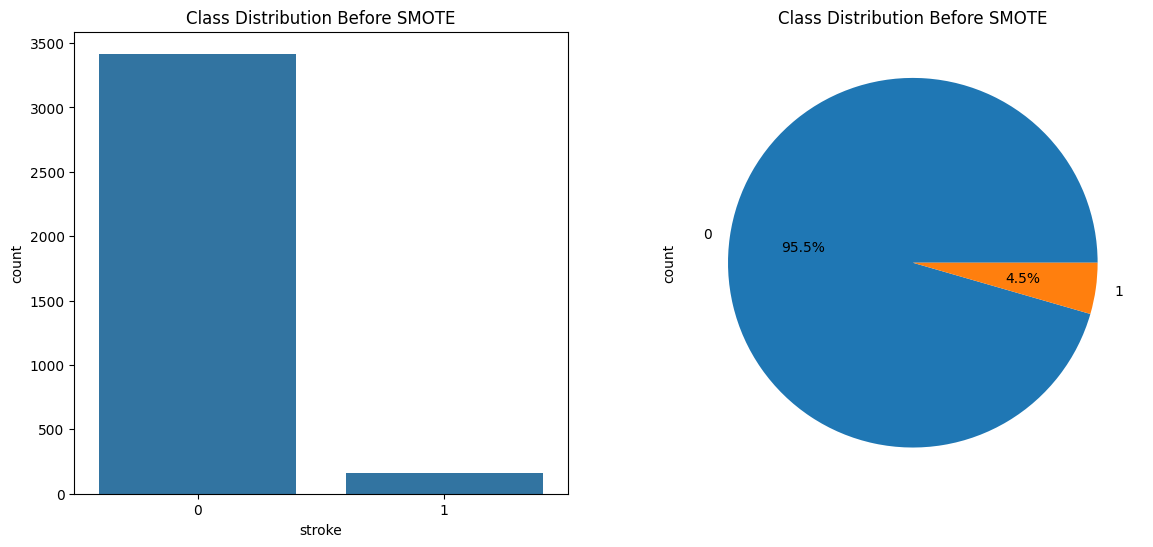

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
df = pd.DataFrame(data)

# Drop ID column (not needed for modeling)
df = df.drop(columns=['id'])

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize scaler and apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot class distribution before SMOTE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution Before SMOTE')

plt.show()


SCALING and SMOTE

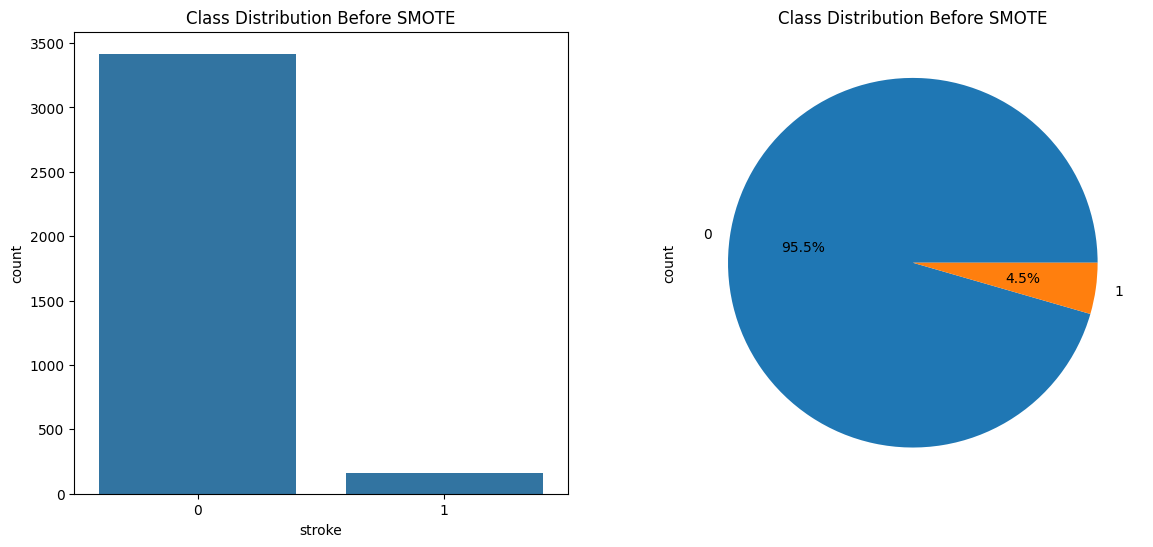

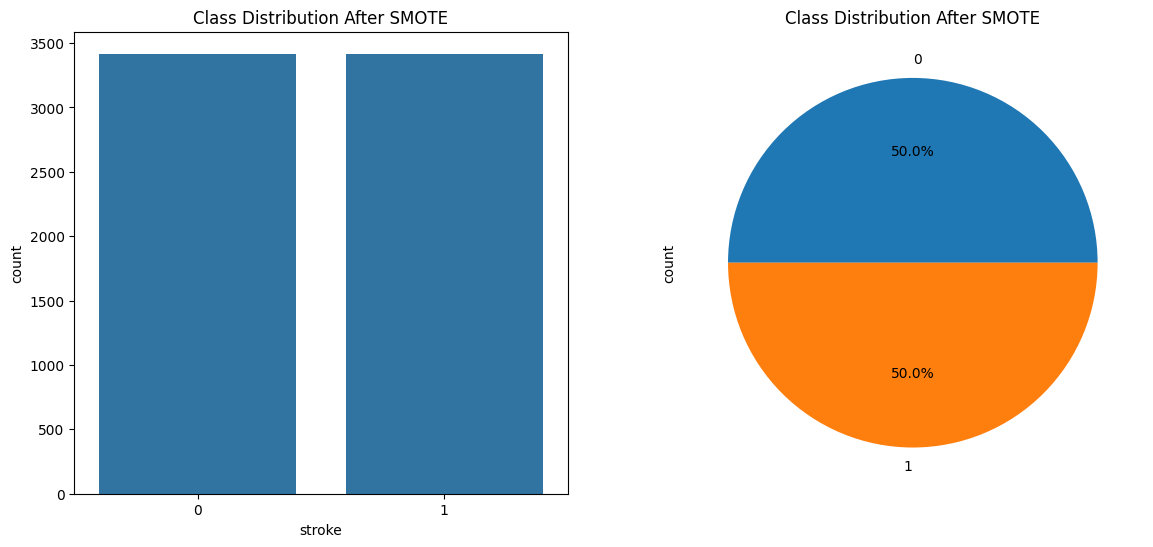

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Assuming 'data' is your DataFrame
df = pd.DataFrame(data)

# Drop ID column (not needed for modeling)
df = df.drop(columns=['id'])

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Apply scaling after SMOTE
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SMOTE with custom parameters
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)

# Apply SMOTE to the training set
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


# Plot class distribution before SMOTE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution Before SMOTE')

plt.show()

# Plot class distribution after SMOTE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution After SMOTE')

plt.show()




AFTER SMOTE AND SCALING

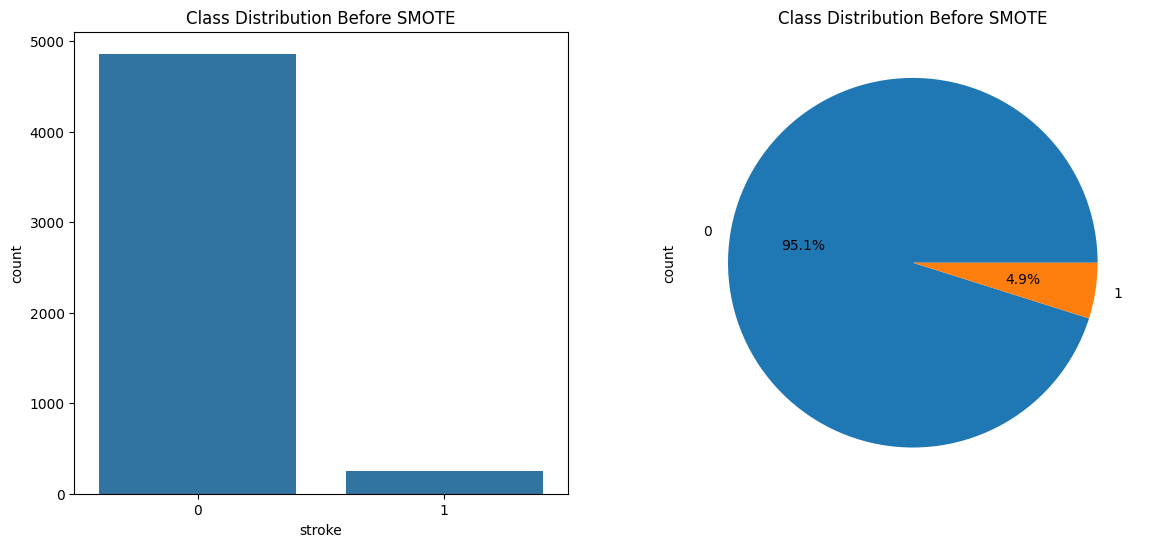

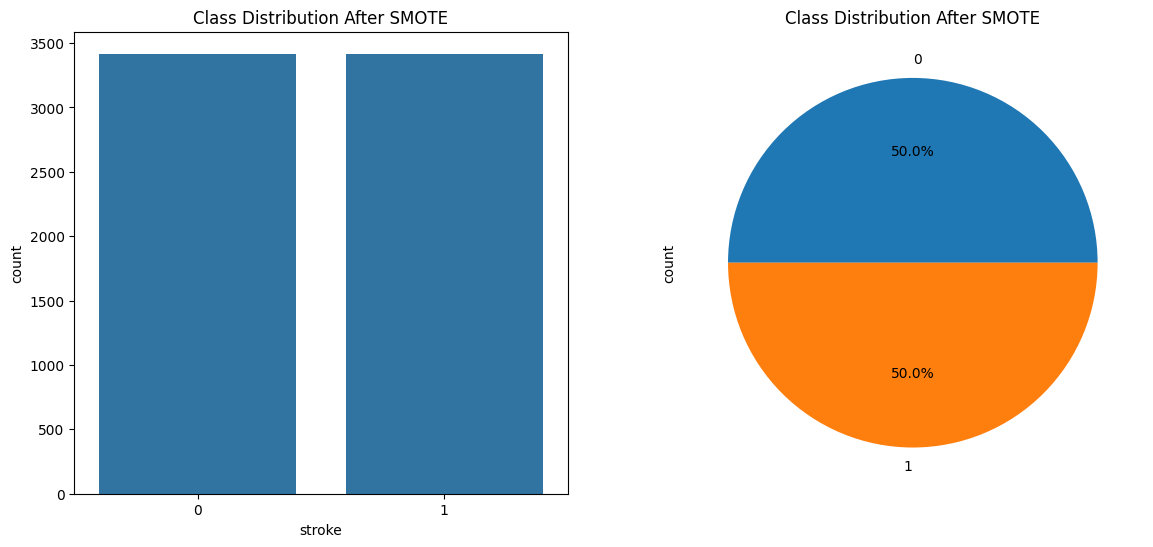

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
df = pd.DataFrame(data)

# Drop ID column (not needed for modeling)
df = df.drop(columns=['id'])

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot class distribution before SMOTE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution Before SMOTE')

plt.show()

# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled features
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Plot class distribution after SMOTE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution After SMOTE')

plt.show()


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Plot class distribution after ADASYN
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled)
plt.title('Class Distribution After ADASYN')

plt.subplot(1, 2, 2)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution After ADASYN')

plt.show()


7th method

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1444
           1       0.14      0.04      0.07        89

    accuracy                           0.93      1533
   macro avg       0.54      0.51      0.52      1533
weighted avg       0.90      0.93      0.91      1533

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1444
           1       0.16      0.06      0.08        89

    accuracy                           0.93      1533
   macro avg       0.55      0.52      0.52      1533
weighted avg       0.90      0.93      0.91      1533



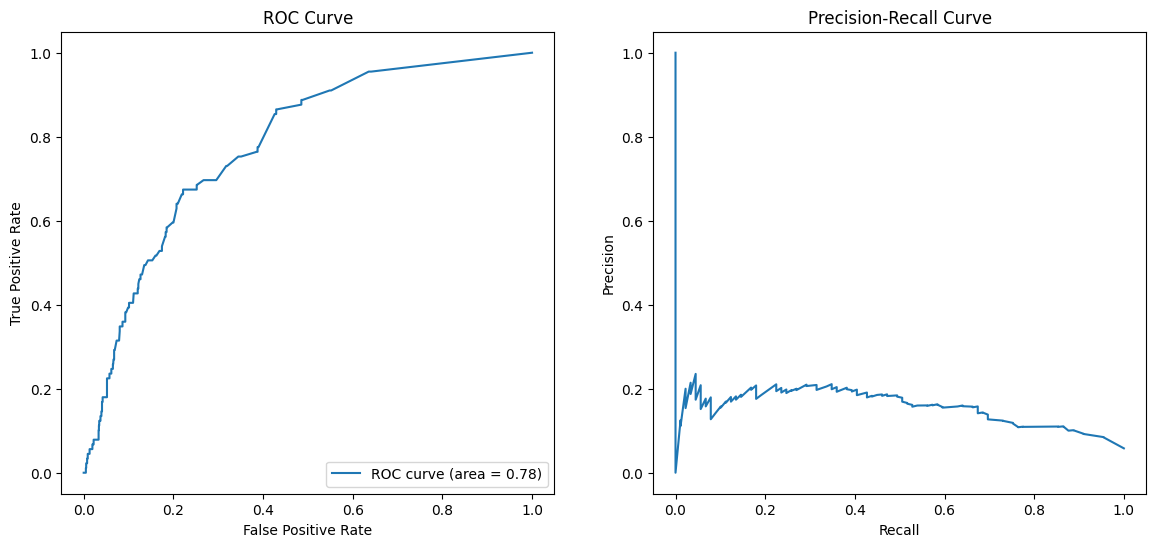

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV

# Example of class weighting
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Example of hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Example of ROC and Precision-Recall curves
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.show()


6th method

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from time import time
'''
# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)
'''
# Initialize LightGBM model
model = lgb.LGBMClassifier(random_state=42)

# Train the model
start_time = time()

#model.fit(X_train_scaled, y_train)
model.fit(X_resampled, y_resampled)

train_time = time() - start_time

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Training Time:", train_time, "seconds")
print("\nClassification Report:\n", report)


[LightGBM] [Info] Number of positive: 3417, number of negative: 3417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6197
[LightGBM] [Info] Number of data points in the train set: 6834, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.928897586431833
Recall: 0.928897586431833
Precision: 0.9066162858724494
F1-Score: 0.9159867650118966
Training Time: 1.1388256549835205 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1444
           1       0.25      0.11      0.16        89

    accuracy                           0.93      1533
   macro avg       0.60      0.55      0.56      1533
weighted avg       0.91      0.93      0.92     

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2ab281da818f36825ccf41f098d5c2be83195333de5eb5296c2277c062fd54c3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Define feature names based on your DataFrame
feature_names = X.columns.tolist()

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_resampled,
    feature_names=feature_names,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

# Explain a single prediction (e.g., the first test instance)
exp = explainer.explain_instance(
    data_row=X_test_scaled[0],  # Example to explain
    predict_fn=model.predict_proba
)

# Visualize the explanation in a notebook
exp.show_in_notebook(show_all=False)


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.6 MB/s eta 0:00:00


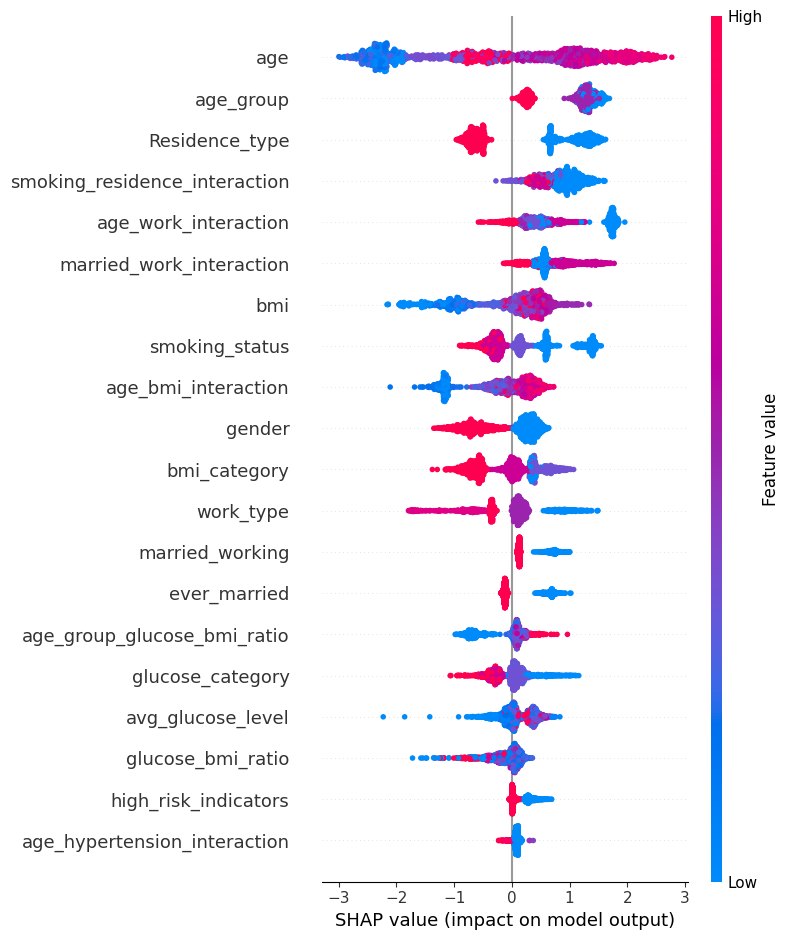

In [ ]:
import shap

# Define feature names based on your DataFrame
feature_names = X.columns.tolist()

# Initialize SHAP explainer for the LightGBM model
shap_explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = shap_explainer.shap_values(X_test_scaled)

# Summary plot for SHAP values
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

# Force plot for a single prediction (e.g., the first test instance)
# For binary classification, shap_values[1] gives SHAP values for the positive class
shap.force_plot(
    shap_explainer.expected_value,  # The base value
    shap_values[0],  # SHAP values for the first instance
    X_test_scaled[0],  # Feature values for the first instance
    feature_names=feature_names
)


Accuracy: 0.11545988258317025
F1 Score: 0.11603650586701433

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11      1444
           1       0.06      1.00      0.12        89

    accuracy                           0.12      1533
   macro avg       0.53      0.53      0.12      1533
weighted avg       0.95      0.12      0.11      1533



<Figure size 1000x600 with 0 Axes>

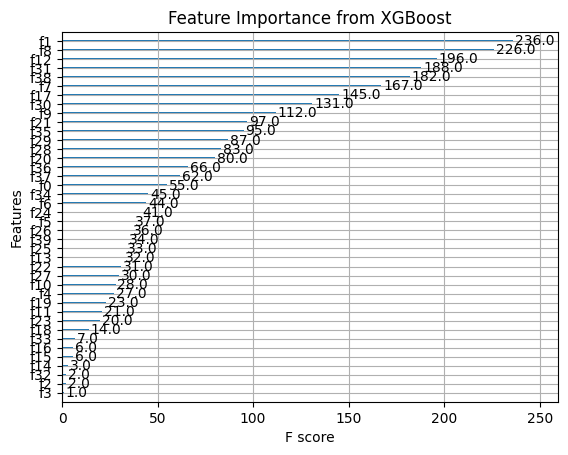

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score
# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
#xgb_model.fit(X_train_scaled, y_train)

xgb_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance from XGBoost')
plt.show()


In [ ]:
import time
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score, average_precision_score, precision_recall_curve

# Initialize the XGBoostClassifier with class weights
model = xgb.XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          use_label_encoder=False,
                          random_state=42,
                          scale_pos_weight=10)  # Adjust this value for better performance

# Combine SMOTE with RandomOverSampler
smote = SMOTE(sampling_strategy='minority', random_state=42)
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

# Hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Start timer
start_time = time.time()

# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
y_probs = grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# End timer
end_time = time.time()
train_time = end_time - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Choose the threshold that gives better precision (example threshold value)
best_threshold = thresholds[np.argmax(precisions >= 0.2)]  # Adjust as needed
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# Print results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)
print("Training Time:", train_time, "seconds")

# Print classification reports
print("\nClassification Report (Original):\n", classification_report(y_test, y_pred))
print("\nClassification Report (Adjusted):\n", classification_report(y_test, y_pred_adjusted))


KeyboardInterrupt: 

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           depth=6,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           random_state=42)

# Train the model on the resampled data

#model.fit(X_train_scaled, y_train)

model.fit(X_resampled, y_resampled)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0:	learn: 0.6383780	total: 12.4ms	remaining: 12.4s
1:	learn: 0.5833513	total: 26.9ms	remaining: 13.4s
2:	learn: 0.5472499	total: 37.7ms	remaining: 12.5s
3:	learn: 0.4954303	total: 50.8ms	remaining: 12.6s
4:	learn: 0.4617713	total: 61.9ms	remaining: 12.3s
5:	learn: 0.4312862	total: 73ms	remaining: 12.1s
6:	learn: 0.4168500	total: 84.3ms	remaining: 12s
7:	learn: 0.3991004	total: 95.2ms	remaining: 11.8s
8:	learn: 0.3764889	total: 106ms	remaining: 11.7s
9:	learn: 0.3610216	total: 118ms	remaining: 11.7s
10:	learn: 0.3554544	total: 129ms	remaining: 11.6s
11:	learn: 0.3484566	total: 140ms	remaining: 11.5s
12:	learn: 0.3339174	total: 152ms	remaining: 11.5s
13:	learn: 0.3277866	total: 163ms	remaining: 11.5s
14:	learn: 0.3214812	total: 174ms	remaining: 11.4s
15:	learn: 0.3138114	total: 186ms	remaining: 11.4s
16:	learn: 0.3044159	total: 197ms	remaining: 11.4s
17:	learn: 0.2962035	total: 208ms	remaining: 11.3s
18:	learn: 0.2906005	total: 223ms	remaining: 11.5s
19:	learn: 0.2875152	total: 235ms	rem

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_resampled, y_resampled)
#gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.10      0.18      1444
           1       0.06      0.92      0.11        89

    accuracy                           0.15      1533
   macro avg       0.51      0.51      0.14      1533
weighted avg       0.90      0.15      0.17      1533



In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=100)

# Train the model on the resampled data
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


0:	learn: 0.6383780	total: 29ms	remaining: 29s
100:	learn: 0.1361139	total: 2.22s	remaining: 19.8s
200:	learn: 0.0835182	total: 3.3s	remaining: 13.1s
300:	learn: 0.0585231	total: 4.37s	remaining: 10.2s
400:	learn: 0.0440782	total: 5.45s	remaining: 8.14s
500:	learn: 0.0344748	total: 6.57s	remaining: 6.54s
600:	learn: 0.0274133	total: 7.64s	remaining: 5.07s
700:	learn: 0.0225011	total: 8.7s	remaining: 3.71s
800:	learn: 0.0186866	total: 9.84s	remaining: 2.44s
900:	learn: 0.0159959	total: 10.9s	remaining: 1.2s
999:	learn: 0.0142734	total: 12.4s	remaining: 0us
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.15      0.26      1444
           1       0.06      0.93      0.12        89

    accuracy                           0.20      1533
   macro avg       0.52      0.54      0.19      1533
weighted avg       0.92      0.20      0.26      1533

Accuracy: 0.1983
Precision: 0.0636
Recall: 0.9326
F1 Score: 0.1190


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Sample data (replace with your actual data)
# X, y = ...

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Initialize CatBoostClassifier with class weights
model = CatBoostClassifier(iterations=10000, learning_rate=0.1, depth=6, random_seed=42, verbose=100, class_weights=class_weight_dict)

# Train the model on the training data
model.fit(X_train, y_train)

# Get predicted probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.7  # You can experiment with different thresholds
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Hyperparameter tuning using Grid Search
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8]
}

grid_search = GridSearchCV(estimator=CatBoostClassifier(random_seed=42, verbose=100),
                           param_grid=param_grid,
                           scoring='precision',
                           cv=3,
                           verbose=1)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Precision: {grid_search.best_score_:.4f}")


0:	learn: 0.6374961	total: 10.2ms	remaining: 1m 41s
100:	learn: 0.2188011	total: 1.19s	remaining: 1m 56s
200:	learn: 0.1046432	total: 2.15s	remaining: 1m 44s
300:	learn: 0.0617282	total: 3.11s	remaining: 1m 40s
400:	learn: 0.0413326	total: 3.94s	remaining: 1m 34s
500:	learn: 0.0290352	total: 5.25s	remaining: 1m 39s
600:	learn: 0.0226295	total: 6.94s	remaining: 1m 48s
700:	learn: 0.0179582	total: 8.97s	remaining: 1m 58s
800:	learn: 0.0145478	total: 10.4s	remaining: 1m 59s
900:	learn: 0.0123069	total: 11.6s	remaining: 1m 57s
1000:	learn: 0.0109183	total: 12.8s	remaining: 1m 55s
1100:	learn: 0.0099095	total: 14s	remaining: 1m 52s
1200:	learn: 0.0094149	total: 15s	remaining: 1m 50s
1300:	learn: 0.0088356	total: 16.4s	remaining: 1m 49s
1400:	learn: 0.0085056	total: 17.2s	remaining: 1m 45s
1500:	learn: 0.0081503	total: 17.8s	remaining: 1m 40s
1600:	learn: 0.0080614	total: 18.9s	remaining: 1m 39s
1700:	learn: 0.0079025	total: 20s	remaining: 1m 37s
1800:	learn: 0.0078806	total: 21s	remaining: 

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from time import time

# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Initialize XGBoost model
model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
start_time = time()
model.fit(X_resampled, y_resampled)
train_time = time() - start_time

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Training Time:", train_time, "seconds")
print("\nClassification Report:\n", report)


Accuracy: 0.45596868884540115
Recall: 0.45596868884540115
Precision: 0.9396889945420789
F1-Score: 0.5710668046331222
Training Time: 6.923089265823364 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.43      0.60      1444
           1       0.09      0.94      0.17        89

    accuracy                           0.46      1533
   macro avg       0.54      0.68      0.38      1533
weighted avg       0.94      0.46      0.57      1533



In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from time import time

# Initialize SMOTE and scale features
smote = SMOTE(sampling_strategy='minority', random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Initialize LightGBM model with class weights
model1 = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='precision_weighted')
start_time = time()
grid_search.fit(X_resampled, y_resampled)
train_time = time() - start_time

# Best model from GridSearchCV
model1 = grid_search.best_estimator_

# Calibrate the model using Platt scaling
calibrated_model1 = CalibratedClassifierCV(model1, method='sigmoid', cv=5)
calibrated_model1.fit(X_resampled, y_resampled)

# Initialize a second model for ensemble (e.g., RandomForest)
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=42, class_weight='balanced')

# Ensemble the models using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lgb', calibrated_model1), ('rf', model2)], voting='soft')
ensemble_model.fit(X_resampled, y_resampled)

# Cross-validation to check model performance
scores = cross_val_score(ensemble_model, X_resampled, y_resampled, cv=5, scoring='precision_weighted')
print("Cross-Validated Precision:", scores.mean())

# Make predictions with the default threshold
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
custom_threshold = 0.5  # Default threshold for balanced performance
y_pred = (y_pred_proba >= custom_threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Training Time:", train_time, "seconds")
print("\nClassification Report:\n", report)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from time import time

# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Initialize XGBoost model
model = xgb.XGBClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'scale_pos_weight': [1, len(y) / (2 * sum(y == 1))]  # Adjusting class weights
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted', verbose=1, n_jobs=-1)

# Train the model with GridSearchCV
start_time = time()
grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_
train_time = time() - start_time

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Training Time:", train_time, "seconds")
print("\nClassification Report:\n", report)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


KeyboardInterrupt: 

In [ ]:
import catboost as cb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from time import time

# Initialize SMOTE and scale features
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Initialize CatBoost model
model = cb.CatBoostClassifier(random_state=42, verbose=0)

# Train the model
start_time = time()
model.fit(X_resampled, y_resampled)
train_time = time() - start_time

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Training Time:", train_time, "seconds")
print("\nClassification Report:\n", report)


Accuracy: 0.5622961513372472
Recall: 0.5622961513372472
Precision: 0.9051971643637735
F1-Score: 0.6738532242142614
Training Time: 20.622902393341064 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.71      1444
           1       0.08      0.58      0.13        89

    accuracy                           0.56      1533
   macro avg       0.52      0.57      0.42      1533
weighted avg       0.91      0.56      0.67      1533



5th method

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time

# Define model with initial parameters
gbm = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=150,
    max_depth=7,
    subsample=0.8,
    random_state=42
)

# Fit the model
start_time = time.time()
gbm.fit(X_resampled, y_resampled)
train_time = (time.time() - start_time) / 60  # time in minutes

# Evaluate on the test set
y_pred = gbm.predict(X_test_scaled)
print(f"Training time: {train_time:.2f} minutes")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Use GridSearchCV for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print("Best parameters found:", grid_search.best_params_)


Training time: 0.19 minutes
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.24      0.06      0.09        89

    accuracy                           0.93      1533
   macro avg       0.59      0.52      0.53      1533
weighted avg       0.90      0.93      0.92      1533



KeyboardInterrupt: 

4th method

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model with class weights
gbm = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=150,
    max_depth=7
)

# Fit the model
start_time = time.time()
gbm.fit(X_resampled, y_resampled)
train_time = (time.time() - start_time) / 60  # time in minutes

# Evaluate on the test set
y_pred = gbm.predict(X_test_scaled)
print(f"Training time: {train_time:.2f} minutes")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Training time: 0.22 minutes
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.24      0.04      0.08        89

    accuracy                           0.94      1533
   macro avg       0.59      0.52      0.52      1533
weighted avg       0.90      0.94      0.92      1533



3rd method

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the model
gbm = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring='precision', cv=5, n_jobs=-1, verbose=1)

# Fit the model
start_time = time.time()
grid_search.fit(X_resampled, y_resampled)
train_time = (time.time() - start_time) / 60  # time in minutes

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best precision score: {grid_search.best_score_:.2f}")
print(f"Training time: {train_time:.2f} minutes")

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

2nd time

In [ ]:
import pandas as pd
import time
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize models
models = {
    'Gradient Boosting Machine': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, depth=6, iterations=100, verbose=0)
}

# Train and evaluate models
for name, model in models.items():
    start_time = time.time()
    model.fit(X_resampled, y_resampled)
    train_time = (time.time() - start_time) / 60  # time in minutes

    # Make predictions and evaluate
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Training time: {train_time:.2f} minutes")
    print("Classification Report:")
    print(report)
    print("="*60)

one method

In [ ]:
# Define models
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
catboost_model = CatBoostClassifier(random_state=42, verbose=0)


In [ ]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)

    return {
        'cv_accuracy': cv_scores.mean(),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc
    }

# Evaluate LightGBM
lgb_results = evaluate_model(lgb_model, X_resampled, y_resampled, X_test_scaled, y_test)
print("LightGBM Results:", lgb_results)

# Evaluate XGBoost
xgb_results = evaluate_model(xgb_model, X_resampled, y_resampled, X_test_scaled, y_test)
print("XGBoost Results:", xgb_results)

# Evaluate CatBoost
catboost_results = evaluate_model(catboost_model, X_resampled, y_resampled, X_test_scaled, y_test)
print("CatBoost Results:", catboost_results)


[LightGBM] [Info] Number of positive: 2734, number of negative: 2733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 5467, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500091 -> initscore=0.000366
[LightGBM] [Info] Start training from score 0.000366
[LightGBM] [Info] Number of positive: 2734, number of negative: 2733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 5467, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [ ]:
# Comparing results
results = {
    'LightGBM': lgb_results,
    'XGBoost': xgb_results,
    'CatBoost': catboost_results
}

for model_name, metrics in results.items():
    print(f"{model_name} - CV Accuracy: {metrics['cv_accuracy']:.4f}, Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1 Score: {metrics['f1_score']:.4f}, AUC-ROC: {metrics['auc_roc']:.4f}")


LightGBM - CV Accuracy: 0.9524, Accuracy: 0.9419, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC-ROC: 0.5039
XGBoost - CV Accuracy: 0.9526, Accuracy: 0.9419, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC-ROC: 0.4630
CatBoost - CV Accuracy: 0.9437, Accuracy: 0.9419, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, AUC-ROC: 0.4860


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Sample data preparation (replace with your dataset)
# X, y = your_data_features, your_data_target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Resampling techniques
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Create and train the model with class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Adjust threshold to improve precision
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Adjust this threshold based on precision-recall trade-offs
y_pred_adjusted = (y_proba > threshold).astype(int)
print("Classification report with adjusted threshold:")
print(classification_report(y_test, y_pred_adjusted))

# Cross-validation for precision
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])
scores = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
print("Cross-validated precision scores:", scores)


              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1444
           1       0.18      0.58      0.27        89

    accuracy                           0.82      1533
   macro avg       0.57      0.71      0.59      1533
weighted avg       0.92      0.82      0.86      1533

Classification report with adjusted threshold:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1444
           1       0.14      0.75      0.24        89

    accuracy                           0.72      1533
   macro avg       0.56      0.74      0.54      1533
weighted avg       0.93      0.72      0.80      1533

Cross-validated precision scores: [0.11575563 0.13087248 0.12269939 0.13804714 0.14339623]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Try RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("RandomForestClassifier classification report:")
print(classification_report(y_test, y_pred))

# Try GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("GradientBoostingClassifier classification report:")
print(classification_report(y_test, y_pred))

# Try Support Vector Machine
model = SVC(class_weight='balanced', probability=True, random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("SVC classification report:")
print(classification_report(y_test, y_pred))


RandomForestClassifier classification report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      1444
           1       0.09      0.66      0.16        89

    accuracy                           0.59      1533
   macro avg       0.53      0.62      0.44      1533
weighted avg       0.91      0.59      0.70      1533

GradientBoostingClassifier classification report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14      1444
           1       0.06      1.00      0.12        89

    accuracy                           0.13      1533
   macro avg       0.53      0.54      0.13      1533
weighted avg       0.95      0.13      0.14      1533

SVC classification report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.29      0.04      0.08        89

    accuracy                           0.94      1533
   ma

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='precision')
grid_search.fit(X_resampled, y_resampled)
print("Best parameters for Logistic Regression:", grid_search.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

# Start timing
start_time = time.time()

# Assuming 'data' is your dataset
df = pd.DataFrame(data)

# Drop ID column (not needed for modeling)
df = df.drop(columns=['id'])

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Encode categorical features if needed (for demonstration purposes)
# encoder = LabelEncoder()
# X['categorical_feature'] = encoder.fit_transform(X['categorical_feature'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define the Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(gbm, param_grid, scoring='f1', cv=5)
grid_search.fit(X_resampled, y_resampled)

# Get the best model
best_gbm = grid_search.best_estimator_

# Train the model on the resampled data
best_gbm.fit(X_resampled, y_resampled)

# Make predictions
y_pred = best_gbm.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Precision, Recall, F1 Score for the minority class
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)

# End timing
end_time = time.time()
print("\nTime taken to develop and evaluate the model:", end_time - start_time, "seconds")


Accuracy Score: 0.9347684279191129

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1444
           1       0.26      0.07      0.11        89

    accuracy                           0.93      1533
   macro avg       0.60      0.53      0.54      1533
weighted avg       0.91      0.93      0.92      1533

Precision: 0.2608695652173913
Recall: 0.06741573033707865
F1 Score: 0.10714285714285714

Time taken to develop and evaluate the model: 262.925954580307 seconds


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy Score: 0.9419439008480104

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize LightGBM Classifier
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate the model
print("LightGBM Accuracy Score:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 160, number of negative: 3417
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 3577, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044730 -> initscore=-3.061344
[LightGBM] [Info] Start training from score -3.061344
LightGBM Accuracy Score: 0.9360730593607306

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.15      0.02      0.04        89

    accuracy                           0.94      1533
   macro avg       0.55      0.51      0.50      1533
weighted avg       0.90      0.94      0.91      1533



In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00
